In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/data_science/EDA-20250310T173139Z-001/EDA/spotify.csv')
df.head(10)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
5,Drake,God's Plan,87,198973,6DCZcSspjsKoFjzjrWoCdn
6,Drake,Passionfruit,86,298940,5mCPDVBb16L4XQwDdbRUpz
7,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
8,Drake,Fair Trade (with Travis Scott),85,291175,40iJIUlhi6renaREYGeIDS
9,Drake,Rich Flex,85,239359,1bDbXMyjaUIooNwFE9wn0N


Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [5]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [6]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [8]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
435,True
436,False
437,False
438,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

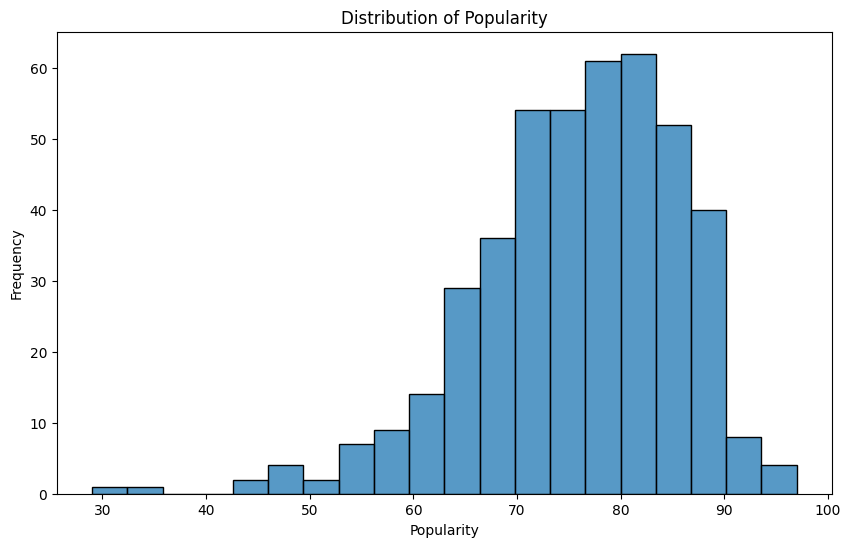

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['Popularity'])
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

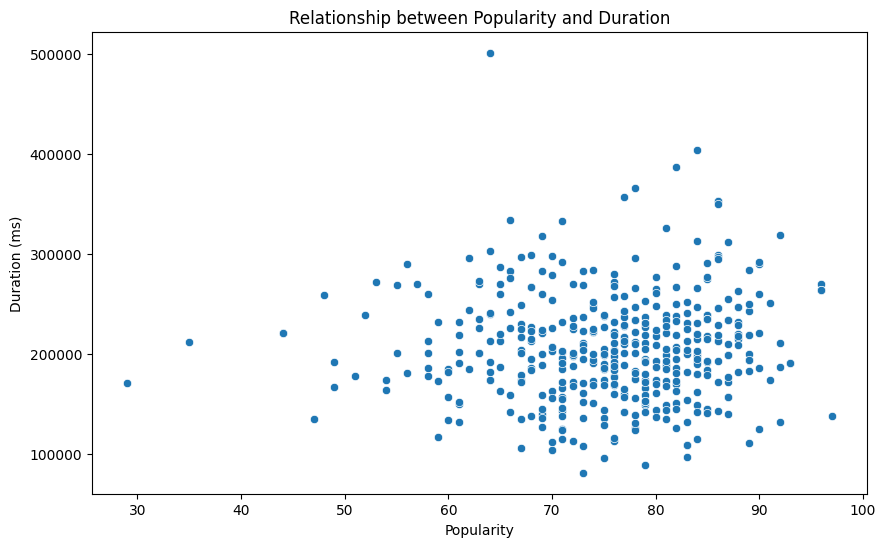

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Popularity'], y=df['Duration (ms)'], palette='pastel')
plt.title('Relationship between Popularity and Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

In [16]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

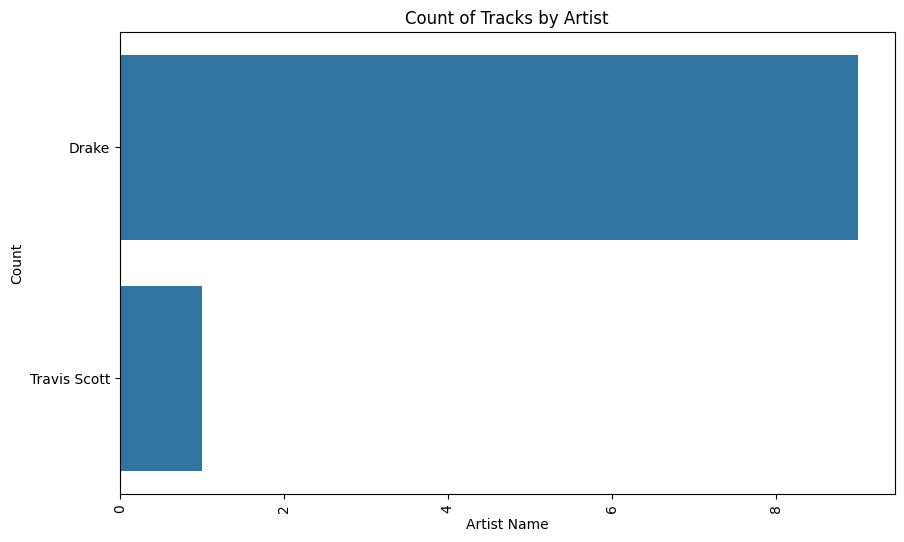

In [27]:

plt.figure(figsize=(10,6))
sns.countplot(df['Artist'].head(10))
plt.title('Count of Tracks by Artist')
plt.xlabel('Artist Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [30]:
least_popular_tracks = df.nsmallest(5, 'Popularity')
least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
435,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47


In [31]:
# Sorting the DataFrame by 'Popularity' in ascending order and selecting the top 5 least popular tracks
least_popular_tracks = df.sort_values(by='Popularity').head(5)

# Displaying artist name and track name for the top 5 least popular tracks
print("Top 5 Least Popular Tracks:")
for index, row in least_popular_tracks.iterrows():
    print(f"Artist: {row['Artist']}, Track Name: {row['Track Name']}")

Top 5 Least Popular Tracks:
Artist: Pressa, Track Name: Attachments (feat. Coi Leray)
Artist: Justin Bieber, Track Name: Intentions
Artist: French Montana, Track Name: Splash Brothers
Artist: French Montana, Track Name: Splash Brothers
Artist: Lil Baby, Track Name: On Me - Remix


6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [32]:
popular_artists = df.nlargest(5, 'Popularity')
average_popularity_by_artist = popular_artists.groupby('Artist')['Popularity'].mean()
average_popularity_by_artist

,Popularity
Artist,
21 Savage,96.0
Jack Harlow,97.0
Travis Scott,93.0
¥$,96.0


7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [34]:
most_popular_tracks = popular_artists.groupby('Artist')['Track Name'].apply(list)
most_popular_tracks

,Track Name
Artist,
21 Savage,[redrum]
Jack Harlow,[Lovin On Me]
Travis Scott,[FE!N (feat. Playboi Carti)]
¥$,"[CARNIVAL, CARNIVAL]"


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


<Figure size 1000x600 with 0 Axes>

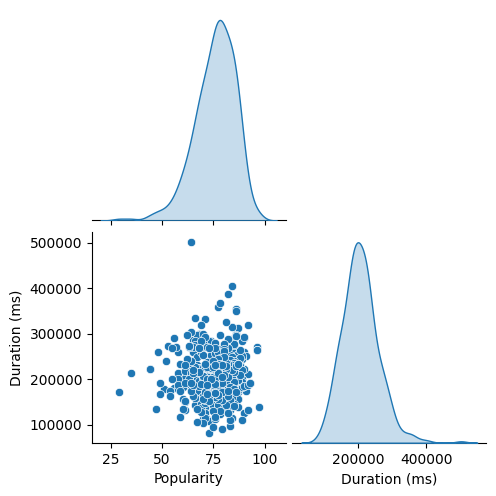

In [36]:
plt.figure(figsize=(10,6))
sns.pairplot(df[['Popularity', 'Duration (ms)']],diag_kind='kde', corner=True)
plt.show()

9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

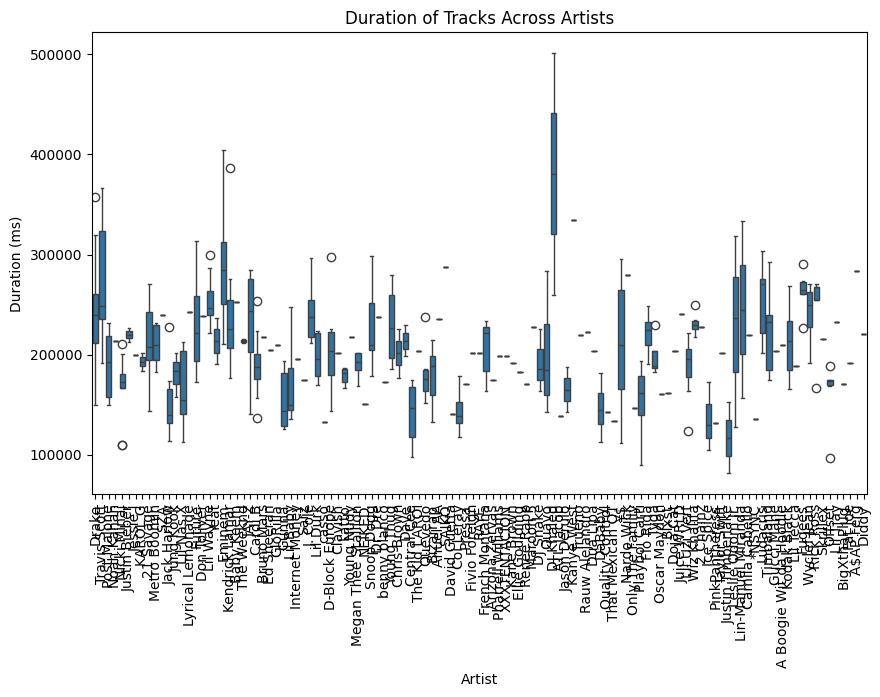

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)
plt.xticks(rotation=90)
plt.title('Duration of Tracks Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.show()

10.. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

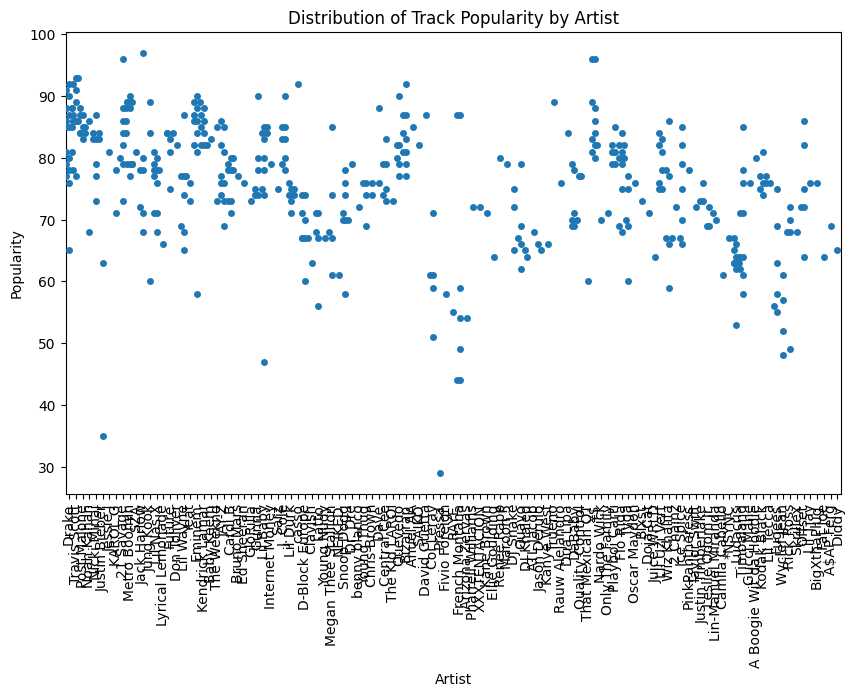

In [42]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Artist', y='Popularity', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Track Popularity by Artist')
plt.show()

In [29]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')